# Project Inspiration
Youtube is the most popular online video sharing platform which has tons of interesting videos from millions of artists, content creators.

This project simply came from my curiorsity about top trending videos on Youtube to discover any interesting findings based on my analysis. It's just for fun!

Let's jump into it!

# Questions
These are a few questions that I find interesting

Top viewed videos. Which artists produce most videos having above 1B views?

What is the most popular video category?

How is user engagement?

What time period that most of these trending videos were published?

What time in a day when these videos were commonly released?

Any other interesting findings, side story?


# Dataset
The datasets that I will be using are pulled from Kaggle

Name: YouTube music videos w/1B+ views

Credit: PRANAV941

Source: https://www.kaggle.com/datasets/pranav941/youtubebillion-views-music-videos

Format: CSV files

!pip install missingno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset of 1B Youtube videos

youtube = pd.read_csv("C:\\Users\\nguye\\OneDrive - iPrice Group\\Documents\\Project Dataset\\1B YouTube.csv",encoding='ISO-8859-1')

In [3]:
youtube.head()

,Column1,thumbnailUrl,published_date,published_hour,channel_name,channel_id,video_id,video_url,video_tags,cat_id,defaultAudioLanguage,views,likes,comments,Minutes,video_duration,featuring,artist,tittle
0,0,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,21/8/2020,3:58,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,gdZLi9oWNZg,https://www.youtube.com/watch?v=gdZLi9oWNZg,"BIGHIT,???,?????,BTS,BANGTAN,??",10,en,1521861575,34506115,16039232,3.73,224,NaN,BTS,Dynamite
1,1,https://i.ytimg.com/vi/CZt-rVn2BJs/default.jpg,2/10/2020,5:30,Desi Records,UC36Ah1MtcBPjwP1RXEDXOZA,CZt-rVn2BJs,https://www.youtube.com/watch?v=CZt-rVn2BJs,"52 gaj ka daman,52 Gaj Pranjal Dahiya,Pranjal ...",10,hi,1423488438,6991068,145845,3.18,191,NaN,"PRANJAL DAHIYA,AMAN JAJI,RENUKA PANWAR,MUKESH ...",52 GAJ KA DAMAN
2,2,https://i.ytimg.com/vi/VuNIsY6JdUw/default.jpg,16/6/2009,22:02,TaylorSwiftVEVO,UCANLZYMidaCbLQFWXBC95Jg,VuNIsY6JdUw,https://www.youtube.com/watch?v=VuNIsY6JdUw,"Taylor,Swift,Big,Machine,Records,LLC,Country",10,en-US,1331652258,8576951,417058,3.82,229,NaN,Taylor Swift,You Belong With Me
3,3,https://i.ytimg.com/vi/msSc7Mv0QHY/default.jpg,6/11/2013,16:52,J. Geco,UCpIMOJmLiDq8ikUzrjezMIA,msSc7Mv0QHY,https://www.youtube.com/watch?v=msSc7Mv0QHY,"Chicken,song,dance,remix,dubstep,techno,house,...",10,it,1304781302,6937450,209575,2.52,151,NaN,J.Geco,Chicken Song
4,4,https://i.ytimg.com/vi/dQw4w9WgXcQ/default.jpg,25/10/2009,6:57,Rick Astley,UCuAXFkgsw1L7xaCfnd5JJOw,dQw4w9WgXcQ,https://www.youtube.com/watch?v=dQw4w9WgXcQ,"rick astley,Never Gonna Give You Up,nggyu,neve...",10,en,1249126991,14796530,2187460,3.55,213,NaN,Rick Astley,Never Gonna Give You Up


In [4]:
youtube.columns

Index(['Column1', 'thumbnailUrl', 'published_date', 'published_hour',
       'channel_name', 'channel_id', 'video_id', 'video_url', 'video_tags',
       'cat_id', 'defaultAudioLanguage', 'views', 'likes', 'comments',
       'Minutes', 'video_duration', 'featuring', 'artist', 'tittle'],
      dtype='object')

In [5]:
# Drop unneccessary columns

youtube = youtube.drop(['Column1','thumbnailUrl','channel_id',
       'video_id', 'video_url'], axis=1)

In [6]:
youtube.columns

Index(['published_date', 'published_hour', 'channel_name', 'video_tags',
       'cat_id', 'defaultAudioLanguage', 'views', 'likes', 'comments',
       'Minutes', 'video_duration', 'featuring', 'artist', 'tittle'],
      dtype='object')

# Cleaning process
- Inspect dataset by visualization using missingno module.

Observation:

- 2 rows mixed up between 'Artist' & 'Title', then split it.
- Those videos have 0 comments due to the comment function being disabled, all 3 cartoon videos are from Disney.

<AxesSubplot:>

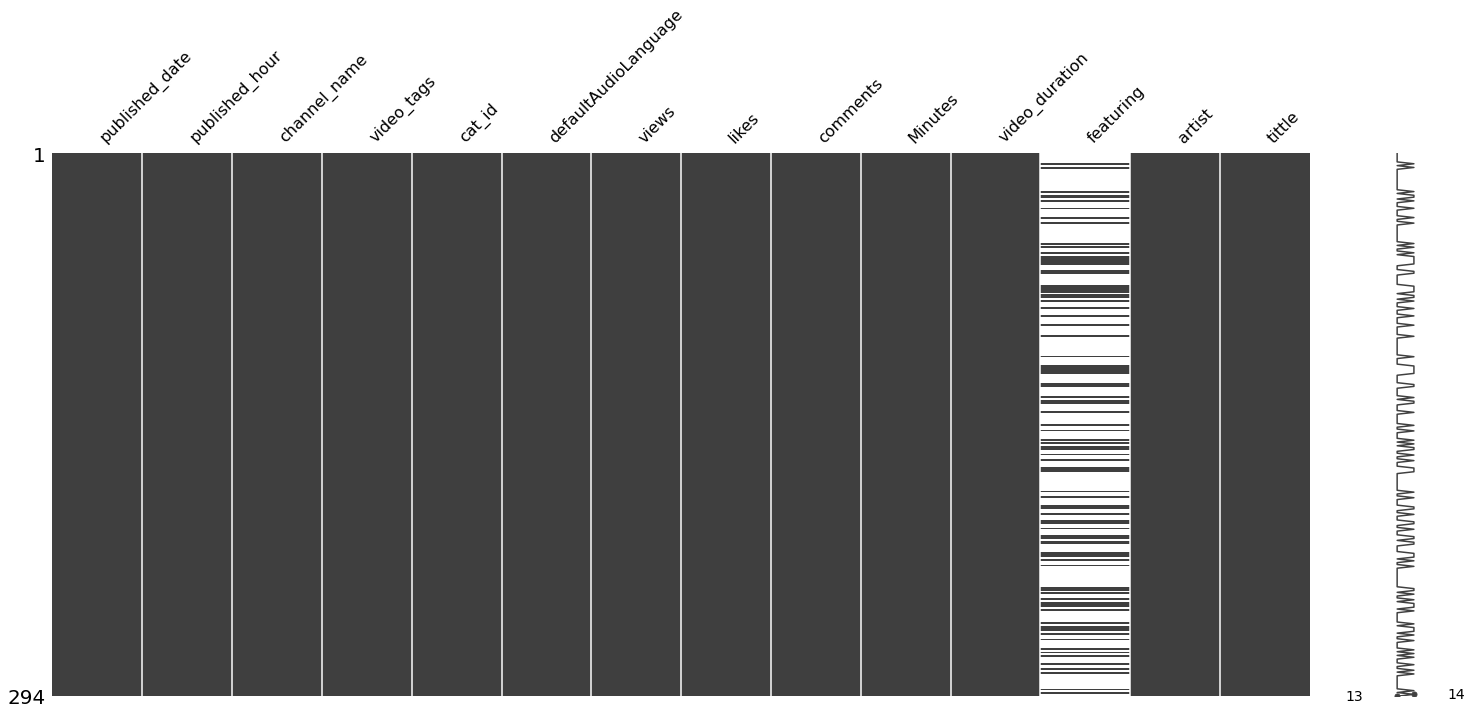

In [7]:
# Inspect dataset quality

msno.matrix(youtube)

In [8]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   published_date        294 non-null    object 
 1   published_hour        294 non-null    object 
 2   channel_name          294 non-null    object 
 3   video_tags            294 non-null    object 
 4   cat_id                294 non-null    int64  
 5   defaultAudioLanguage  294 non-null    object 
 6   views                 294 non-null    int64  
 7   likes                 294 non-null    int64  
 8   comments              294 non-null    int64  
 9   Minutes               294 non-null    float64
 10  video_duration        294 non-null    int64  
 11  featuring             92 non-null     object 
 12  artist                294 non-null    object 
 13  tittle                294 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 32.3+ KB


In [9]:
# Top 10 videos have the most views
top_videos = youtube[['tittle','artist','views']].nlargest(n=10, columns = 'views')
top_videos

,tittle,artist,views
208,Despacito,Luis Fonsi,7905249684
212,Shape of You,Ed Sheeran,5762568227
167,See You Again,Wiz Khalifa,5569210905
166,Uptown Funk,Mark Ronson,4626830580
158,GANGNAM STYLE(?????) M/V,PSY,4479519944
174,Sugar,Maroon 5,3724875772
162,Roar,Katy Perry,3614951058
168,Counting Stars,OneRepublic,3606027843
178,Sorry (PURPOSE : The Movement),Justin Bieber,3563187029
177,Thinking Out Loud,Ed Sheeran,3470399438


As expected, Despacito (by Luis Fonsi) is the most viewed video until now with almost 8 billions views. That's crazy!

<AxesSubplot:>

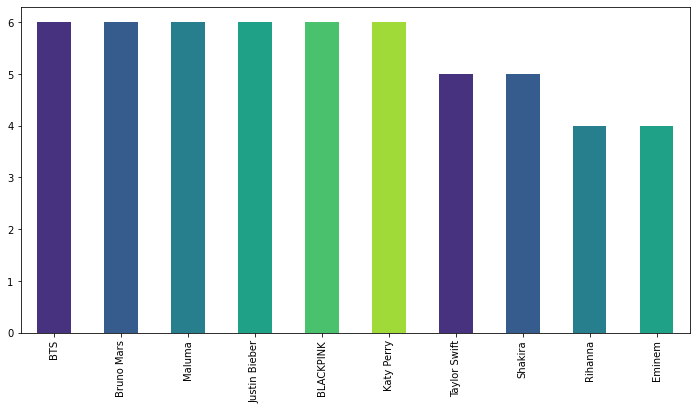

In [10]:
# Top 10 artists have most videos with more than 1B views
top_artists = youtube['artist'].value_counts().nlargest(10).plot(kind='bar', figsize=(12,6), color=sns.color_palette("viridis"))
top_artists

Among all popular artists like BST, Bruno Mars ... it turns out Maluma who I never listened to before is super famous. And it's funny that he is my girlfriend's favorite artist now after I showed her my finding because she also didn't know about him previously.

In [11]:
# Join 1B Youtube data with Category file
category = pd.read_csv("C:\\Users\\nguye\\OneDrive - iPrice Group\\Documents\\Project Dataset\\categories.csv", encoding='ISO-8859-1')

youtube_cat = youtube.merge(category, left_on='cat_id', right_on='id',how = 'left')
youtube_cat.head()

,published_date,published_hour,channel_name,video_tags,cat_id,defaultAudioLanguage,views,likes,comments,Minutes,video_duration,featuring,artist,tittle,id,category_name
0,21/8/2020,3:58,HYBE LABELS,"BIGHIT,???,?????,BTS,BANGTAN,??",10,en,1521861575,34506115,16039232,3.73,224,NaN,BTS,Dynamite,10,Music
1,2/10/2020,5:30,Desi Records,"52 gaj ka daman,52 Gaj Pranjal Dahiya,Pranjal ...",10,hi,1423488438,6991068,145845,3.18,191,NaN,"PRANJAL DAHIYA,AMAN JAJI,RENUKA PANWAR,MUKESH ...",52 GAJ KA DAMAN,10,Music
2,16/6/2009,22:02,TaylorSwiftVEVO,"Taylor,Swift,Big,Machine,Records,LLC,Country",10,en-US,1331652258,8576951,417058,3.82,229,NaN,Taylor Swift,You Belong With Me,10,Music
3,6/11/2013,16:52,J. Geco,"Chicken,song,dance,remix,dubstep,techno,house,...",10,it,1304781302,6937450,209575,2.52,151,NaN,J.Geco,Chicken Song,10,Music
4,25/10/2009,6:57,Rick Astley,"rick astley,Never Gonna Give You Up,nggyu,neve...",10,en,1249126991,14796530,2187460,3.55,213,NaN,Rick Astley,Never Gonna Give You Up,10,Music


<AxesSubplot:>

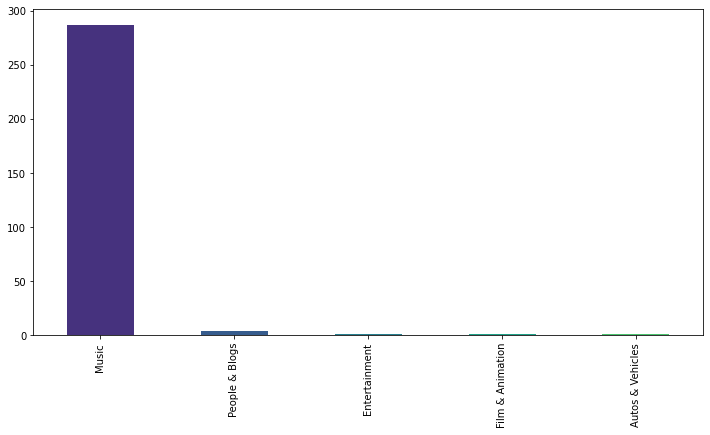

In [12]:
# Most popular video category
top_categories = youtube_cat['category_name'].value_counts().nlargest(10).plot(kind='bar', figsize=(12,6), color=sns.color_palette("viridis"))
top_categories

No doubt that "Music" is the most common category since most viewed videos are mainly music MV. But interestingly there are a few videos tagged under other categories like People & Blogs, Entertainment ... also gained huge attention from the audiences. Let's find out what these videos are.

In [13]:
# Videos aren't tagged under "Music"
not_music = youtube_cat[youtube_cat['category_name'] != "Music"]
not_music.loc[:, ["tittle","category_name","views"]]

,tittle,category_name,views
10,????? (AS IF IT'S YOUR LAST)' M/V,People & Blogs,1186495421
40,The Fox (What Does The Fox Say?),Entertainment,1071527995
48,Bodak Yellow,People & Blogs,1055675097
131,??? (BOOMBAYAH)' M/V,People & Blogs,1441994701
202,along | Official Disney UK,Film & Animation,2896308798
221,Shaky Shaky,Autos & Vehicles,1627824082
241,Where Are Ü Now,People & Blogs,1217447014


It turns out these videos above were wrongly tagged under incorrect categories, except "FROZEN | Let It Go Sing-along | Official Disney UK" is categorized under Film & Animation which makes sense.

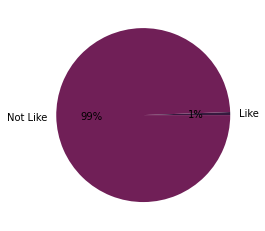

In [14]:
# Percentage of likes
total_likes = youtube['likes'].sum()
total_not_likes = youtube['views'].sum() - youtube['likes'].sum()
data1 = [total_likes, total_not_likes]
labels = ['Like', 'Not Like']
color = sns.color_palette('rocket')
plt.pie(data1, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

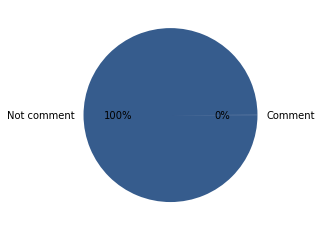

In [15]:
# Percentage of comments
total_comments = youtube['comments'].sum()
total_not_comments = youtube['views'].sum() - youtube['comments'].sum()
data = [total_comments, total_not_comments]
labels = ['Comment', 'Not comment']
color = sns.color_palette('viridis')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

In [16]:
print(total_likes)
print(total_comments)
print(total_comments/total_likes)

2740986343
168877547
0.06161196221618679


It seems most people tend to watch only without reacting to the videos. Or they may like/comment but tend to watch multiple times.

Out of those videos have "like" reaction, only 6% of them have user comments.

In [17]:
# Average time duration
avg_duration_by_mins = round(youtube['video_duration'].mean()/60,2)
avg_duration_by_mins

4.16

In [18]:
# Covert time into year format
import datetime
youtube['published_date'] = pd.to_datetime(youtube['published_date'])
youtube['year'] = youtube['published_date'].dt.year
youtube['year'].head()

0    2020
1    2020
2    2009
3    2013
4    2009
Name: year, dtype: int64

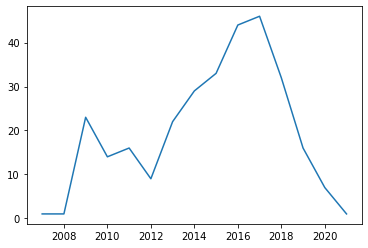

In [19]:
# 1B videos published by year
vid_by_year = pd.DataFrame(youtube.groupby('year').size())
plt.plot(vid_by_year)
plt.show()

It was an explosion of top-view videos produced in 2017. But this trend seems decline afterwards. Let's find out the reason.

<AxesSubplot:xlabel='Songs'>

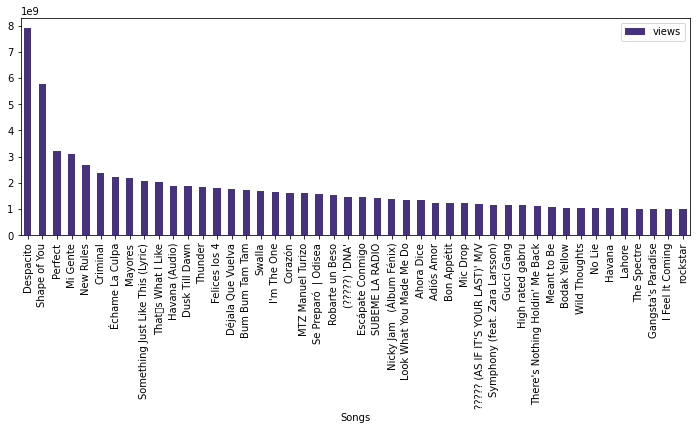

In [20]:
youtube_2017 = youtube[youtube['year']==2017]
data = youtube_2017.loc[:, ['tittle','views']].sort_values(by='views')
data.set_index('tittle',inplace=True)
data.sort_values(by='views',ascending=False).plot(kind='bar',xlabel='Songs', figsize=(12,4), color=sns.color_palette("viridis"))

It seems the extraodinary successes of those MV like "Despacito", "Shape of you"... brought huge impact on music trend in 2017, which might positively influence audience experience to listen more in that year.

Related article

https://variety.com/2017/digital/news/youtube-2017-top-trending-videos-music-videos-1202631416/

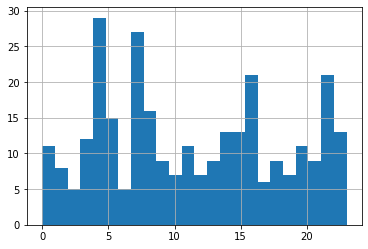

In [22]:
# Published time in a day
youtube['hour'] = pd.to_datetime(youtube['published_hour'], format='%H:%M').dt.hour
youtube['hour'].hist(bins=24)
plt.show()

Interesting that beside common hour like 4PM, 10PM when people tend to watch Youtube for break or entertaining, many videos were also released during abnormal hours like 4AM or 7AM when most of people are still in bed. Hypothetically, it might be due to Youtube algorithm at particular time period might impact video impressions to audiences.

Read more about related articles

https://blog.hubspot.com/marketing/best-time-to-post-youtube

https://www.searchenginejournal.com/did-youtube-change-its-algorithm/424581/#close

# That's all. Thanks for reading my findings!